# Tracking Coronavirus(COVID-19) Spread in India(Statewise Stats)

### NOTE : 
### This statistics corresponds to April 21, 2020 as the code was written on this date.
### To get statistics of the current date rerun the program.
### Fetching the latest Statewise data of COVID-19 cases from the official website of Ministry of Health and visualizing it using                 Python libraries.


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 21 17:55:35 2020
@author: Rudrajit Choudhuri
"""

'\nCreated on Mon Apr 21 17:55:35 2020\n@author: Rudrajit Choudhuri\n'

# Importing the libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests # Makes HTTP requests
from bs4 import BeautifulSoup # Pulls data out of html and xml files
import geopandas as gpd # Library for working with geospatial data
from prettytable import PrettyTable # Represent tabular data in visually appealing ASCII tables

# Web Scraping

In [4]:
url = 'https://www.mohfw.gov.in/'

# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content

# parse the html content
soup = BeautifulSoup(web_content, "html.parser")

# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', ' ') for x in row]

# find all table rows and data cells within
stats = []
all_rows = soup.find_all('tr')

for row in all_rows:
    stat = extract_contents(row.find_all('td'))
    
    # notice that the data we require is now a list of length 5
    if len(stat) == 5:
        stats.append(stat)


# Statistics

In [5]:
# Convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
# Converting scraped data into int type from string type
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased'] = state_data['Deceased'].map(int)
state_data.head() # Preview of stats
#print(state_data) # Entire Stats

,Sr.No,States/UT,Confirmed,Recovered,Deceased
0,1,Andaman and Nicobar Islands,16,11,0
1,2,Andhra Pradesh,757,96,22
2,3,Arunachal Pradesh,1,1,0
3,4,Assam,35,19,1
4,5,Bihar,114,42,2


In [8]:
# Presenting data using PrettyTable
table = PrettyTable()
table.field_names = (new_cols)

for i in stats:
    table.add_row(i)

table.add_row(["","Total", 
               sum(state_data["Confirmed"]), 
               sum(state_data["Recovered"]),
               sum(state_data["Deceased"])])
print(table)

+-------+-----------------------------+-----------+-----------+----------+
| Sr.No |          States/UT          | Confirmed | Recovered | Deceased |
+-------+-----------------------------+-----------+-----------+----------+
|   1   | Andaman and Nicobar Islands |     16    |     11    |    0     |
|   2   |        Andhra Pradesh       |    757    |     96    |    22    |
|   3   |      Arunachal Pradesh      |     1     |     1     |    0     |
|   4   |            Assam            |     35    |     19    |    1     |
|   5   |            Bihar            |    114    |     42    |    2     |
|   6   |          Chandigarh         |     26    |     13    |    0     |
|   7   |         Chhattisgarh        |     36    |     25    |    0     |
|   8   |            Delhi            |    2081   |    431    |    47    |
|   9   |             Goa             |     7     |     7     |    0     |
|   10  |           Gujarat           |    2066   |    131    |    77    |
|   11  |           Harya

# Visualization

# Bar Chart - Statewise total confirmed cases

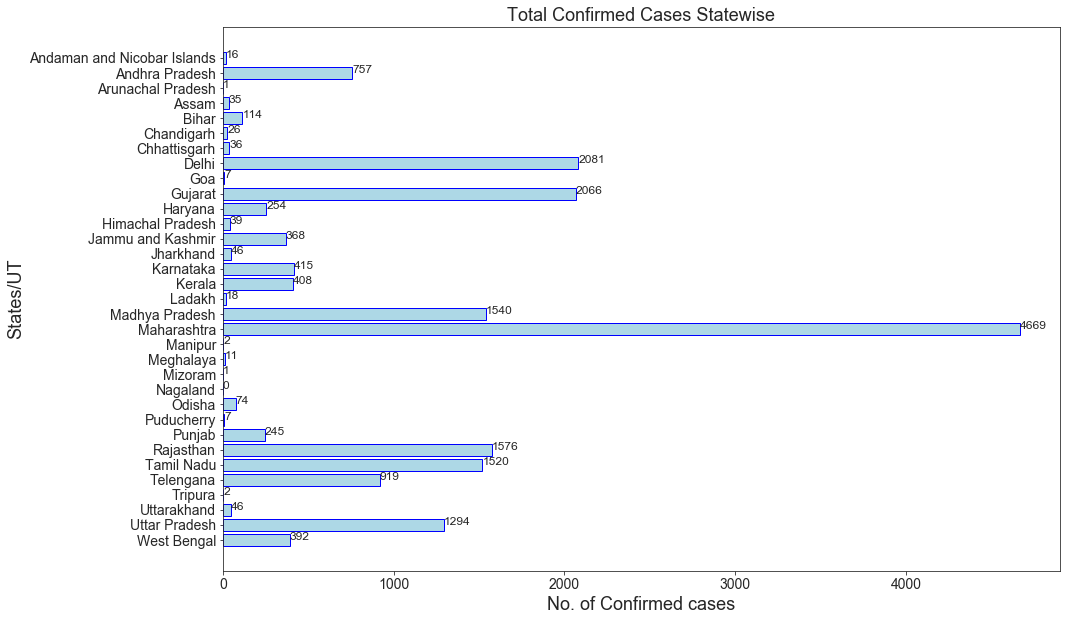

In [9]:
sns.set_style("ticks")
plt.figure(figsize = (15, 10))
#Plotting horizontal barplot
plt.barh(state_data["States/UT"],
state_data["Confirmed"].map(int), align = 'center',
color = 'lightblue', edgecolor = 'blue')

plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Total Confirmed Cases Statewise", fontsize = 18)

for index, value in enumerate(state_data["Confirmed"]):
    plt.text(value, index, str(value), fontsize = 12)

plt.show()

# Donut Chart - Nationwide total Confirmed, Recovered and Deceased Cases

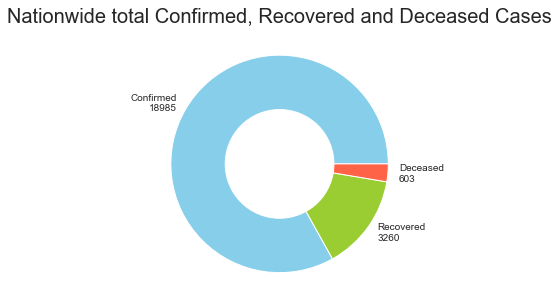

In [10]:
group_size = [sum(state_data['Confirmed']),
              sum(state_data['Recovered']),
              sum(state_data['Deceased'])]

group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])),
                'Recovered\n' + str(sum(state_data['Recovered'])),
                'Deceased\n' + str(sum(state_data['Deceased']))]

custom_colors = ['skyblue', 'yellowgreen', 'tomato']

plt.figure(figsize = (5, 5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12)
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 20)

plt.show()

# Chloropleth map of the total Confirmed Cases

In [11]:
# The shape files used in this article to plot the India map with state boundaries can be downloaded from
#https://map.igismap.com/share-map/export-layer/Indian_States/06409663226af2f3114485aa4e0a23b4

# reading the state wise shape file of map of India in GeoDataFrame
map_data = gpd.read_file('Indian_States.shp')
map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
map_data.head()

# Some of the names of States/UT not consistent with govt website
# Correcting name of states in map_data dataframe 
map_data['States/UT'] = map_data['States/UT'].str.replace('&', 'and')
map_data['States/UT'].replace('Arunanchal Pradesh', 'Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana', 'Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 'Delhi', inplace = True)

In [12]:
# merge both the dataframes - state_data and map_data
merged_data = pd.merge(map_data, state_data, how = 'left', on = 'States/UT')

#merged_data.fillna(value = 0, inplace = True)# Bug issue
merged_data['Confirmed'] = merged_data['Confirmed'].fillna(0)
merged_data['Recovered'] = merged_data['Recovered'].fillna(0)
merged_data['Deceased'] = merged_data['Deceased'].fillna(0)
merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data.head() # Preview

#print(merged_data)# Merged dataframe 

,States/UT,geometry,Confirmed,Recovered,Deceased
0,Andaman and Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0.0,0.0,0.0
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",1.0,1.0,0.0
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",35.0,19.0,1.0
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",114.0,42.0,2.0
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",26.0,13.0,0.0


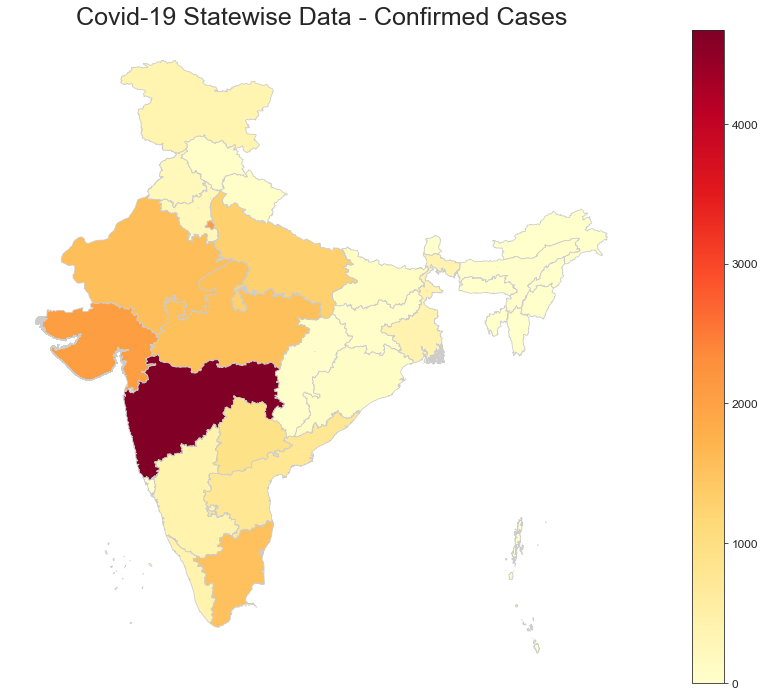

In [13]:
# Display Statewise data on map of India 
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data - Confirmed Cases', fontdict = {'fontsize': '25', 'fontweight' : '3'})
# plot the figure
merged_data.plot(column = 'Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)

plt.show()